All imported packages are used to visualize the function and result of the algorithm.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from tabulate import tabulate

Following function will be used to test the algorithm:

$f = (5x_1-x_2)^4 + (x_1-2)^2 + x_1 - 2x_2 + 12$

$\begin{equation}
\frac{\partial f}{\partial x_1} = 20(5x_1-x_2)^3 + 2(x_1-2)
\end{equation}$

$\begin{equation}
\frac{\partial f}{\partial x_2} = -4(5x_1-x_2)^3 - 2
\end{equation}$

In [2]:
func = lambda x1,x2 :(5*x1-x2)**4 + (x1-2)**2 + x1 - 2*x2 + 12
funcx1 = lambda x1,x2 : 20*(5*x1-x2)**3 + 2*(x1-2)
funcx2 = lambda x1,x2 : -4*(5*x1-x2)**3 -2

# returns a new function where x2 is set to a constant c.
def set_x2_constant(c):
    return (lambda x1 : (5*x1-c)**4 + (x1-2)**2 + x1 - 2*c + 12)

# returns a new function where x1 is set to a constant c.
def set_x1_constant(c):
    return (lambda x2 : (5*c-x2)**4 + (c-2)**2 + c - 2*x2 + 12)

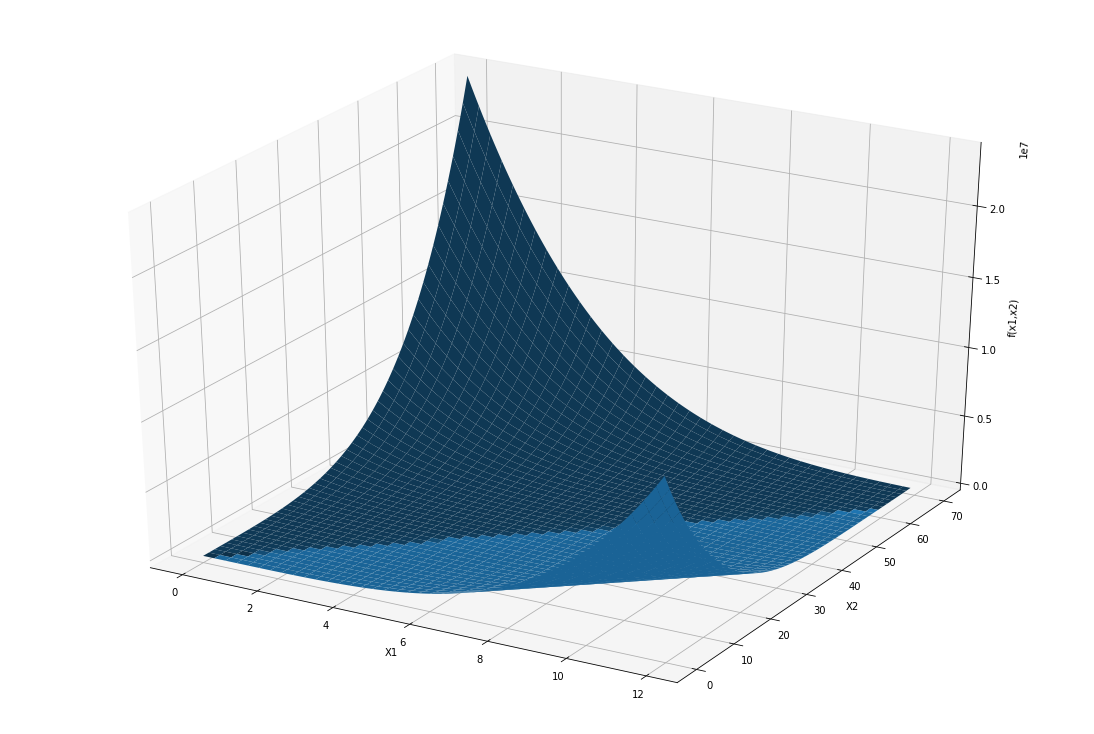

In [3]:
# x1 and x2 are the intervals where function is plotted.
x1 = np.arange(0,12,0.1)
x2 = np.arange(0,70,0.1)

X1,X2 = np.meshgrid(x1,x2)
f = func(X1,X2)
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(X1,X2,f)
plt.xlabel('X1')
plt.ylabel('X2')
ax.set_zlabel('f(x1,x2)')
plt.gcf().set_size_inches(15, 10)
plt.show()

As it can be seen from the picture, the value of the function increases rapidly as it moves away from the global minimum value. Notice that z axis value is multiplied with $10^7$.

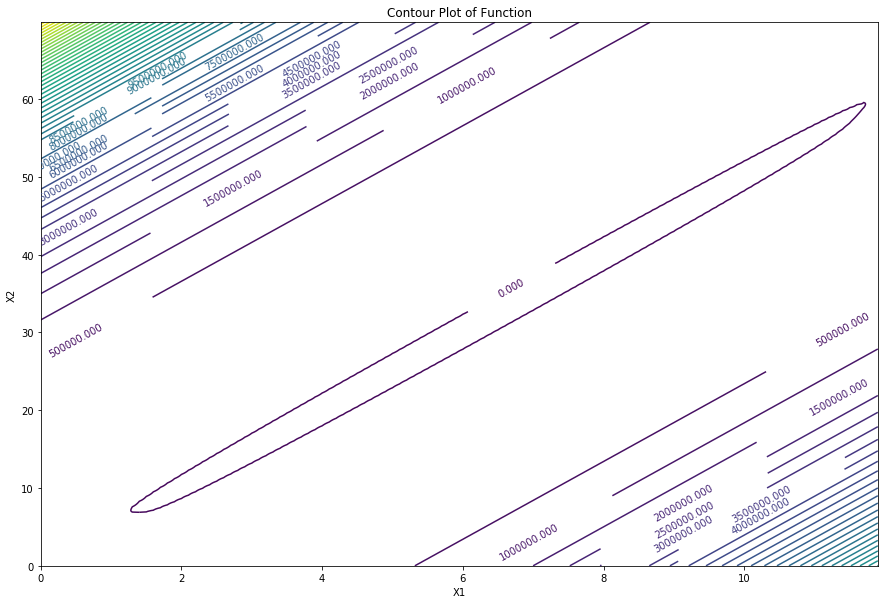

In [4]:
fig,ax2 = plt.subplots()
cs = ax2.contour(X1,X2,f,50)
ax2.clabel(cs,inline=1,fontsize=10)
ax2.set_xlabel("X1")
ax2.set_ylabel("X2")
ax2.set_title('Contour Plot of Function')
plt.gcf().set_size_inches(15, 10)

As it can be seen from the contour plot, global minimum of the function approximately lies on the line $x_2 = 5x_1$ . Notice that every contour line represents a change of $500,000$ in the value of function.

In [5]:
"""
    GOLDEN SECTION METHOD
    It finds the point where the f(x) is the minimum value of the convex function f.
    
    f :     function we want to find minimum value.
    x_low : lower bound of the interval.
    x_up :  upper bound of the interval.
    tol :   tolerance is the stopping condition.
    max_n:  max number of iteration is also a stopping condition.
    
    return: it returns the average of final interval's bounds which is
            approximately equals to point where f(x) is minimum.
"""
def golden(f,x_low, x_up, tol, max_n):
    
    iter_ctr = 0
    while (x_up-x_low)>tol and iter_ctr<max_n:
        x_n1 = x_up - 0.618*(x_up - x_low)
        x_n2 = x_low + 0.618*(x_up - x_low)
        
        if f(x_n1) <= f(x_n2):
            x_up = x_n2
            x_n2 = x_n1
            x_n1 = x_up - 0.618*(x_up - x_low)
        else:
            x_low = x_n1
            x_n1 = x_n2
            x_n2  = x_low + 0.618*(x_up - x_low)
        iter_ctr = iter_ctr + 1
    return (x_n1 + x_n2)/2.0

Golden section method used to find local minimum of a one variable function. It is used to find minimums of the functions where x1 and x2 are set to a constant therefore algorithm could decide the direction of the movement.

In [6]:
"""
    CYCLIC COORDINATE SEARCH METHOD
    It finds the point which is the global minimum of the two variable
    function. => f(x1,x2)
    
    f :     function we want to find minimum value.
    ip :    initial points where algorithm starts.
    
    return: it returns the points where f(x1,x2) is minimum and values while iterating.
"""
def cyclic_coordinate(f,ip):
    x1,x2 = ip
    results = [[0,x1,x2,f(x1,x2)]]
    turn = 1
    diff = 10**10
    iter_ctr = 0
    # epsilon could be changed to adjust the sensitivity of algorithm.
    epsilon = 0.0001
    while diff>epsilon:
        func_x1 = set_x2_constant(x2)
        func_x2 = set_x1_constant(x1)
        if (turn == 1):
            new_x1 = golden(func_x1,x1-5000,x1+5000,0.0001,100)
            diff = abs(f(x1,x2)-f(new_x1,x2))
            x1 = new_x1
            turn = 2
        else:
            new_x2 = golden(func_x2,x2-5000,x2+5000,0.0001,100)
            diff = abs(f(x1,x2)-f(x1,new_x2))
            x2 = new_x2
            turn = 1
        iter_ctr += 1
        results.append([iter_ctr,x1,x2,f(x1,x2)])
    return results

In [7]:
# this is the point where algorithm starts. points with high function value could cause
# overflow since the chosen function increases rapidly.
initial_point = [1,60]

ccs = cyclic_coordinate(func,initial_point)
print(tabulate(ccs[:10]+ccs[-10:],headers=['Iteration','x1','x2','f(x1,x2)']))

  Iteration        x1       x2       f(x1,x2)
-----------  --------  -------  -------------
          0   1        60         9.15052e+06
          1  11.798    60         0.839408
          2  11.798    59.7838    0.628533
          3  11.7551   59.7838    0.383139
          4  11.7551   59.5691    0.175354
          5  11.7124   59.5691   -0.0662981
          6  11.7124   59.3559   -0.271019
          7  11.6701   59.3559   -0.50907
          8  11.6701   59.1439   -0.711115
          9  11.6279   59.1439   -0.945628
        812   6.60187  33.8031  -27.4302
        813   6.60083  33.8031  -27.4303
        814   6.60083  33.7979  -27.4304
        815   6.59979  33.7979  -27.4305
        816   6.59979  33.7927  -27.4306
        817   6.59874  33.7927  -27.4307
        818   6.59874  33.7874  -27.4308
        819   6.5977   33.7874  -27.4309
        820   6.5977   33.7822  -27.431
        821   6.5967   33.7822  -27.4311


Algorithm stoped at the point $(x_1,x_2) = (6.5967,33.7822)$ where the value of the function equals to $-27.4311$ .Global minimum of the function is approximately at the point ($x_1$, $x_2$) $=$ ($6.5$,$33.2937$ ) with value equal to $-27.4406$ which is pretty close to the result of the algorithm. Decreasing the value of ***epsilon*** will led algorithm to converge closer to the global minimum but with the cost of more iterations therefore epsilon value should be chosen wisely or it can be set via tests like *cross-validation*.

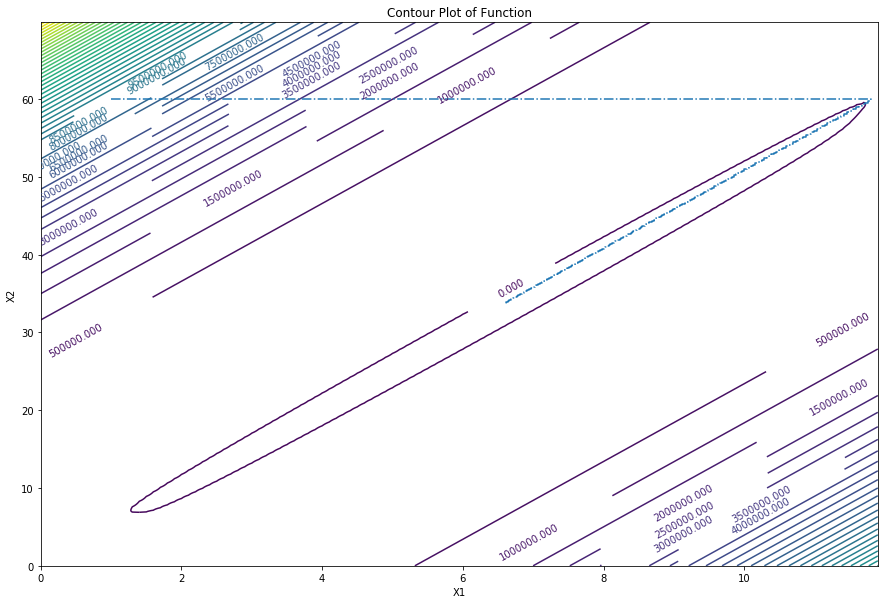

In [8]:
ccs=np.array(ccs)
fig,ax2 = plt.subplots()
cs = ax2.contour(X1,X2,f,50)
ax2.clabel(cs,inline=1,fontsize=10)
ax2.set_xlabel("X1")
ax2.set_ylabel("X2")
ax2.set_title('Contour Plot of Function')
plt.plot(ccs[:,1],ccs[:,2],'-.')
plt.gcf().set_size_inches(15, 10)

In this image every dot represent one iteration of cyclic cordinate search algorithm. Basically algorithm find a direction where function's value gets smaller and moves on that direction until function's value do not get smaller. Then it finds a new direction to move. On the next cells algorithm will be tried with a simpler function.